### Data : Mobile price range set based on the specifications 
### Problem : This is a classification problem , we are using KNN algo

#### Loading the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sns.set()

#### Loading the data 

In [2]:
data = pd.read_csv(r"D:\Data\New folder\Mobile_Price_Range.csv")

In [3]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_weight,talk_time_battery,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power        2000 non-null int64
bluetooth            2000 non-null int64
clock_speed          2000 non-null float64
dual_sim             2000 non-null int64
front_camera         2000 non-null int64
four_g               2000 non-null int64
int_memory           2000 non-null int64
m_depth              2000 non-null float64
mobile_wt            2000 non-null int64
n_cores              2000 non-null int64
primary_camera       2000 non-null int64
px_height            2000 non-null int64
px_width             2000 non-null int64
ram                  2000 non-null int64
screen_height        2000 non-null int64
screen_weight        2000 non-null int64
talk_time_battery    2000 non-null int64
three_g              2000 non-null int64
touch_screen         2000 non-null int64
wifi                 2000 non-null int64
price_range          2000 non-null int64
dtypes: float64(2), int64(19

#### Feature selection through Select K Best algorithm

In [5]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat ([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(12,'Score'))

                Specs          Score
13                ram  931267.519053
11          px_height   17363.569536
0       battery_power   14129.866576
12           px_width    9810.586750
8           mobile_wt      95.972863
6          int_memory      89.839124
15      screen_weight      16.480319
16  talk_time_battery      13.236400
4        front_camera      10.135166
14      screen_height       9.614878
10     primary_camera       9.186054
9             n_cores       9.097556


In [7]:
new = featureScores.nlargest(12,'Score')

In [8]:
new.Specs.values

array(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'screen_weight', 'talk_time_battery', 'front_camera',
       'screen_height', 'primary_camera', 'n_cores'], dtype=object)

In [9]:
cols = ['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'screen_weight', 'talk_time_battery', 'front_camera',
       'screen_height', 'primary_camera', 'n_cores','price_range']

In [10]:
new_data = data[cols]

In [11]:
new_data.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,screen_weight,talk_time_battery,front_camera,screen_height,primary_camera,n_cores,price_range
0,2549,20,842,756,188,7,7,19,1,9,2,2,1
1,2631,905,1021,1988,136,53,3,7,0,17,6,3,2
2,2603,1263,563,1716,145,41,2,9,2,11,6,5,2
3,2769,1216,615,1786,131,10,8,11,0,16,9,6,2
4,1411,1208,1821,1212,141,44,2,15,13,8,14,2,1


#### Spliting data into training and testing

In [12]:
X = new_data.iloc[:,0:12]
y = new_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Select the value of K

Text(0, 0.5, 'testing Accuracy')

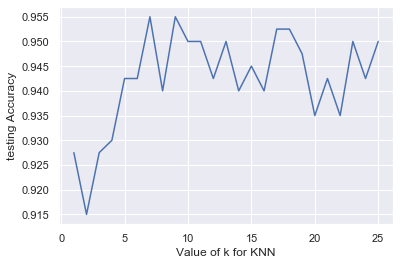

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
    
%matplotlib inline
plt.plot(k_range, score)
plt.xlabel('Value of k for KNN')
plt.ylabel('testing Accuracy')

#### Creating the KNN model

In [14]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.955


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.93      0.96      0.94        91
           2       0.93      0.95      0.94        92
           3       0.99      0.95      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[102   3   0   0]
 [  3  87   1   0]
 [  0   4  87   1]
 [  0   0   6 106]]
